<a href="https://colab.research.google.com/github/fkgusdk/TEAM-YeoRi/blob/main/Section_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## matplotlib & seaborn 라이브러리를 활용한 데이터 시각화

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings # 시각화 오류 문구들 보기 싫으면 이거 import 해주면 좋음

### 설정들

In [2]:
# 시각화 테이블 (?) 크기 
plt.rcParams['figure.figsize'] = [10,8] # (가로, 세로)

# 그 외 스타일들
sns.set(style='whitegrid') # 흰색 바탕 + 격자
sns.set_palette('pastel')
warnings.filterwarnings('ignore')

In [3]:
# 한글이 깨지는 경우 방지 (외울 필요 x -> 한글이 깨지면 복붙해서 사용)
from matplotlib import font_manager, rc
import matplotlib
import platform

if platform.system() == 'Window':
  # 윈도우인 결우
  font_name = font_manager.FontProperties(fname='c:/Window/Fonts/malgun.ttf')
  rc('font',family=font_name)
else:
  # Mac인 경우
  rc('font',family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False

### 데이터셋 불러오기

In [4]:
# seaborn에서 Tips 데이터셋 불러오기
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.shape

(244, 7)

### matplotlib을 활용한 시각화

In [6]:
sum_tip_by_day = tips.groupby('day')['tip'].sum()
sum_tip_by_day

day
Thur    171.83
Fri      51.96
Sat     260.40
Sun     247.39
Name: tip, dtype: float64

In [7]:
x_label = ['Thur','Fri','Sat','Sun']
x_label_index = np.arange(len(x_label))

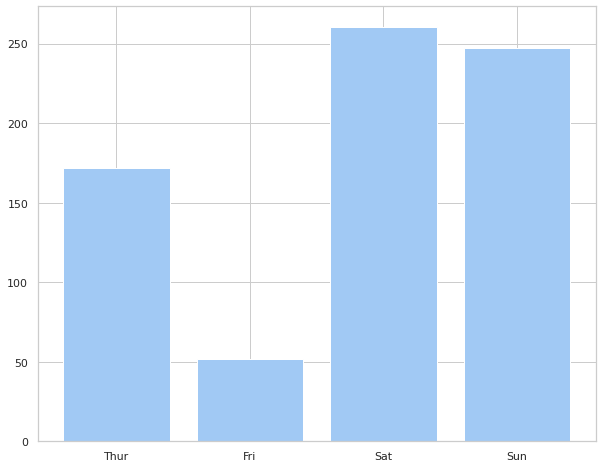

In [8]:
# Bar 차트 이해 및 제작
# 비교에 용이
plt.bar(x_label, sum_tip_by_day) # (x축, y축)
plt.show()

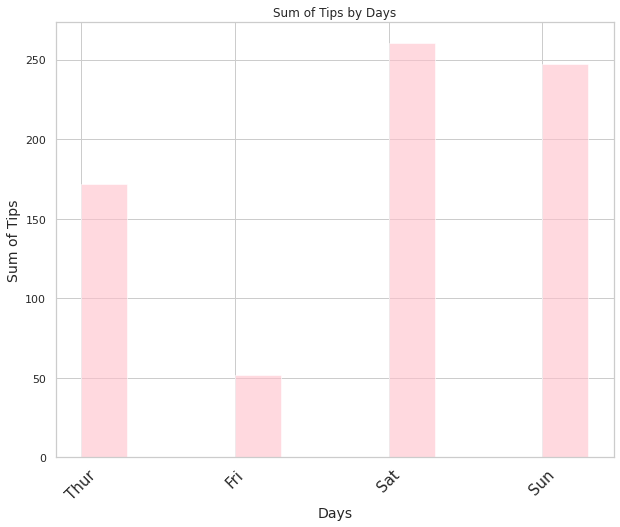

In [9]:
# 옵션들 적용

plt.bar(x_label, sum_tip_by_day,
        color='pink',
        alpha=0.6, # 투명도
        width=0.3, # bar 넓이
        align='edge' # 격자의 한쪽 벽에 붙음 (배치)
        )

plt.title('Sum of Tips by Days')
plt.xlabel('Days', fontsize=14)
plt.ylabel('Sum of Tips', fontsize=14)

plt.xticks(x_label_index,
           x_label,
           rotation=45, # 45도 돌리기
           fontsize=15)
plt.show()

### seaborn 이용

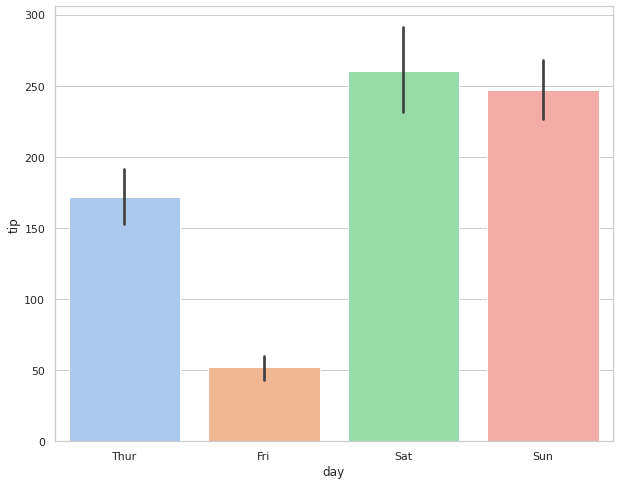

In [10]:
sns.barplot(data=tips,# 데이터 프레임
            x='day',
            y='tip',
            estimator=np.sum)

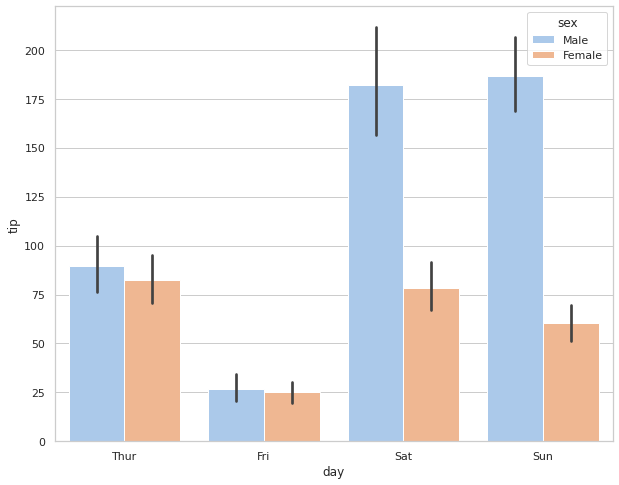

In [11]:
sns.barplot(data=tips,
            x='day',
            y='tip',
            estimator=np.sum,
            hue='sex' # 색깔 구분으로 특정 컬럼값을 비교하고 싶을 때
            #, palette='pastel'
            )

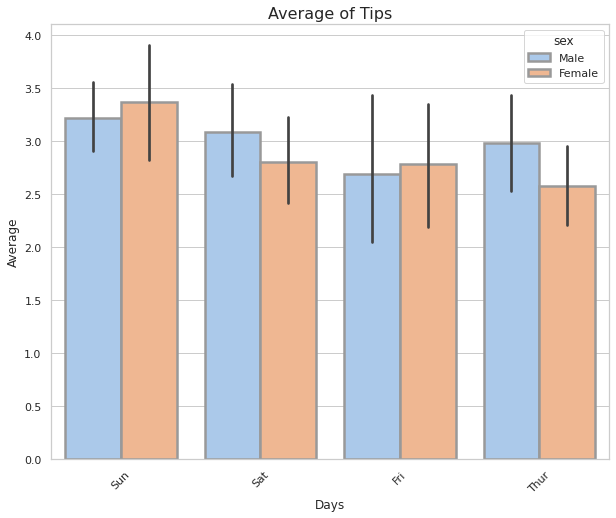

In [12]:
sns.barplot(data=tips,
            x='day',
            y='tip',
            estimator=np.average,
            hue='sex'
            ,order=['Sun','Sat','Fri','Thur'] # xticks 순서
            ,edgecolor='.6'# 바 모서리 색 선명도
            ,linewidth=2.5 # 바 모서리 두께
            )
plt.title('Average of Tips', fontsize=16) # 이게 됨 (seaborn는 plt와 함께 구동되도록 되어있다고 함)
plt.xlabel('Days')
plt.ylabel('Average')
plt.xticks(rotation=45)
plt.show()

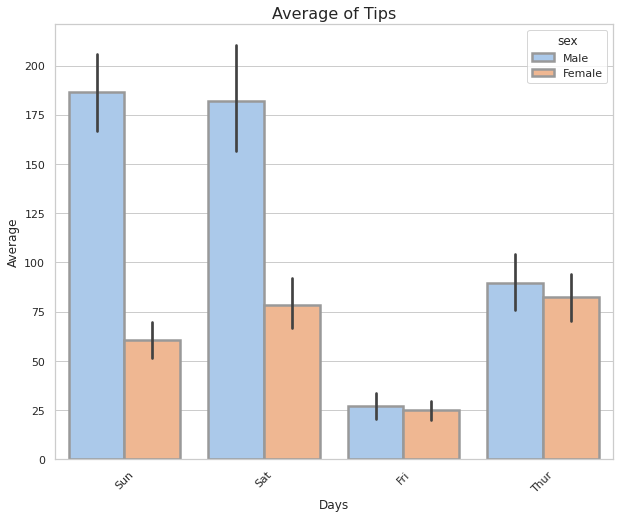

In [13]:
sns.barplot(data=tips,
            x='day',
            y='tip',
            estimator=np.sum,
            hue='sex'
            ,order=['Sun','Sat','Fri','Thur'] # xticks 순서
            ,edgecolor='.6'# 바 모서리 색 선명도
            ,linewidth=2.5 # 바 모서리 두께
            )
plt.title('Average of Tips', fontsize=16) # 이게 됨 (seaborn는 plt와 함께 구동되도록 되어있다고 함)
plt.xlabel('Days')
plt.ylabel('Average')
plt.xticks(rotation=45)
plt.show()